# ML Regression Forrest Fire Prediction

## Part 2: EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df0 = pd.read_csv('algerian-forest-fire-dataset_cleaned.csv')
df = df0.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   temperature  243 non-null    int64  
 4   rh           243 non-null    int64  
 5   ws           243 non-null    int64  
 6   rain         243 non-null    float64
 7   ffmc         243 non-null    float64
 8   dmc          243 non-null    float64
 9   dc           243 non-null    float64
 10  isi          243 non-null    float64
 11  bui          243 non-null    float64
 12  fwi          243 non-null    float64
 13  classes      243 non-null    int64  
 14  region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [4]:
df

,day,month,year,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,fwi,classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [5]:
df['classes'].value_counts()

classes
1    137
0    106
Name: count, dtype: int64

In [6]:
classes_pct = df['classes'].value_counts(normalize=True) * 100

In [7]:
classes_labels = ['Fire','Not Fire']

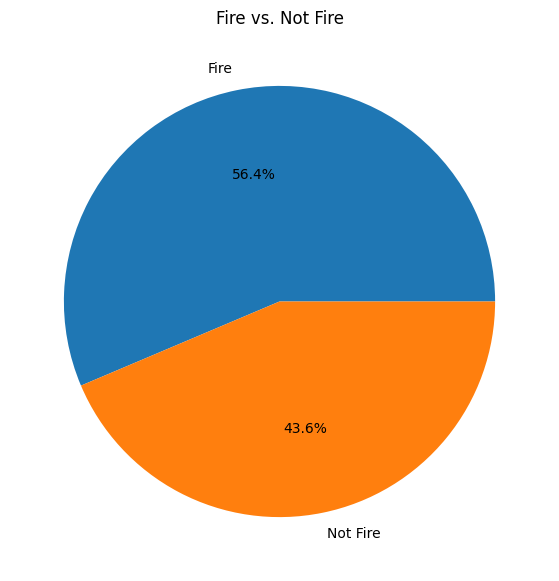

In [8]:
# Pie Chart: Fire vs. Not Fire

plt.figure(figsize=(12,7))
plt.pie(classes_pct,labels=classes_labels,autopct='%1.1f%%')
plt.title('Fire vs. Not Fire')

plt.show();

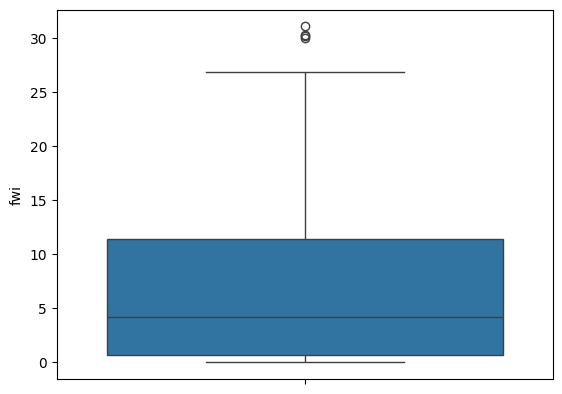

In [9]:
sns.boxplot(df['fwi']);

Text(0.5, 1.0, 'Fire Analysis of Sidi Bel Region')

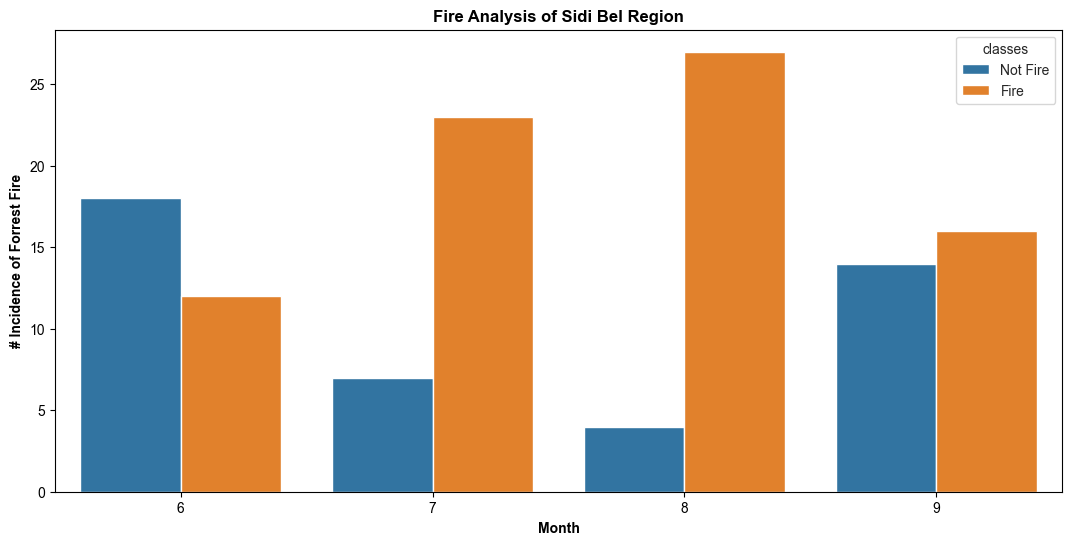

In [10]:
# Monthly Fire analysis

region1 = df.loc[df['region']== 1]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region1)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Sidi Bel Region', weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Region')

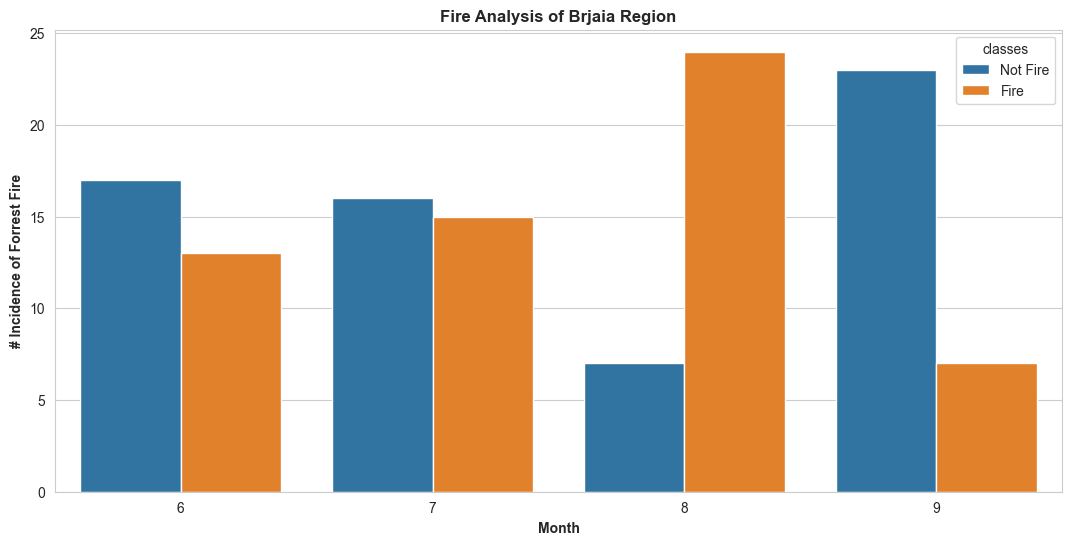

In [11]:
# Monthly Fire analysis

region0 = df.loc[df['region']== 0]

plt.subplots(figsize=(13,6))

sns.set_style('whitegrid')
ax = sns.countplot(x='month',hue='classes',data=region0)

plt.xlabel('Month', weight='bold')
plt.ylabel('# Incidence of Forrest Fire', weight='bold')

# Define custom labels
custom_labels = ['Not Fire', 'Fire']

# Get current legend handles and labels
handles, labels = ax.get_legend_handles_labels()

# Set the new legend labels
ax.legend(handles=handles, labels=custom_labels, title='classes')

plt.title('Fire Analysis of Brjaia Region', weight='bold')

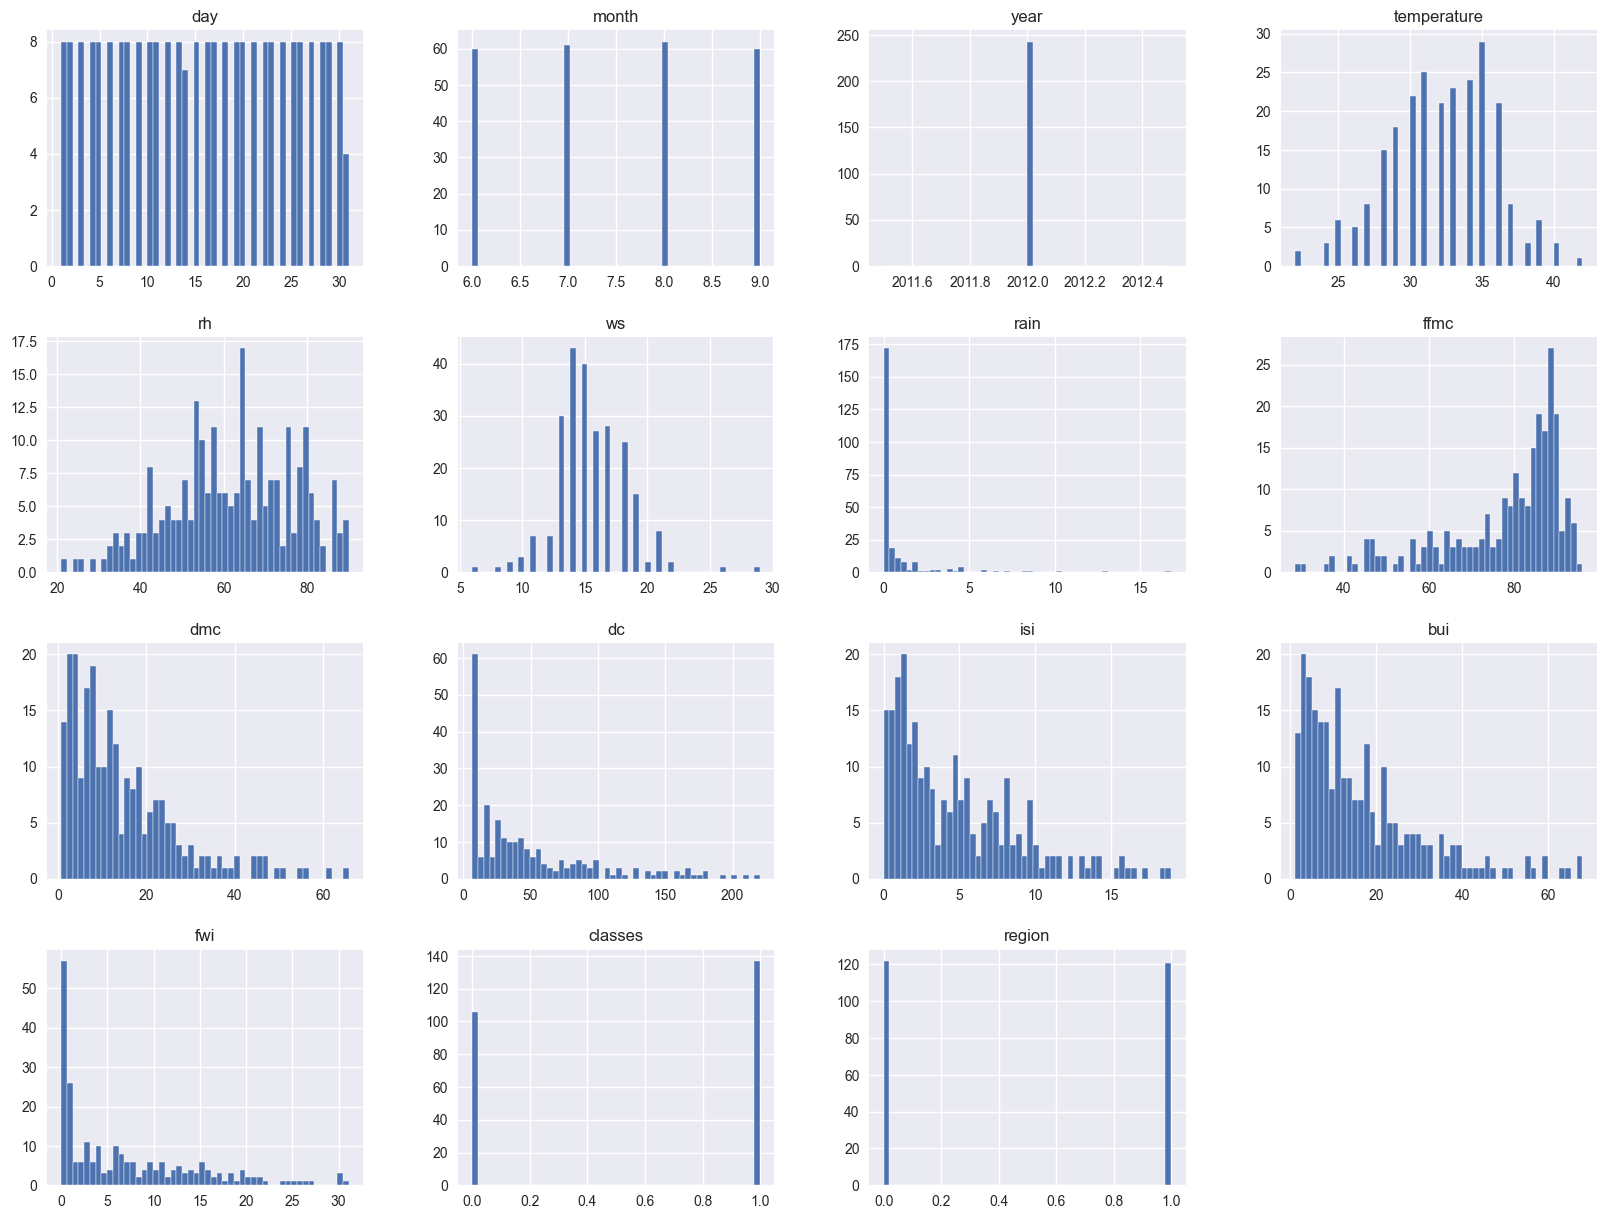

In [12]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50, figsize=(20, 15))

plt.show();

---

## Feature Engineering

In [13]:
df.columns

Index(['day', 'month', 'year', 'temperature', 'rh', 'ws', 'rain', 'ffmc',
       'dmc', 'dc', 'isi', 'bui', 'fwi', 'classes', 'region'],
      dtype='object')

#### Drop Date Cols

In [14]:
date_cols = ['day','month','year']

df = df.drop(date_cols, axis=1)

In [15]:
df.columns

Index(['temperature', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui',
       'fwi', 'classes', 'region'],
      dtype='object')

##### Declare Independent Features & a Dependent Feature

In [16]:
X = df.drop('fwi', axis=1)

In [17]:
y = df['fwi']

In [18]:
X.head()

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [19]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: fwi, dtype: float64

## Train-Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [23]:
y_train.shape, y_test.shape

((182,), (61,))

### Assess Feature Correlations

In [24]:
X_train_corr = X_train.corr()

In [25]:
X_train_corr

,temperature,rh,ws,rain,ffmc,dmc,dc,isi,bui,classes,region
temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
rh,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
ffmc,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
dmc,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
dc,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
isi,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
bui,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


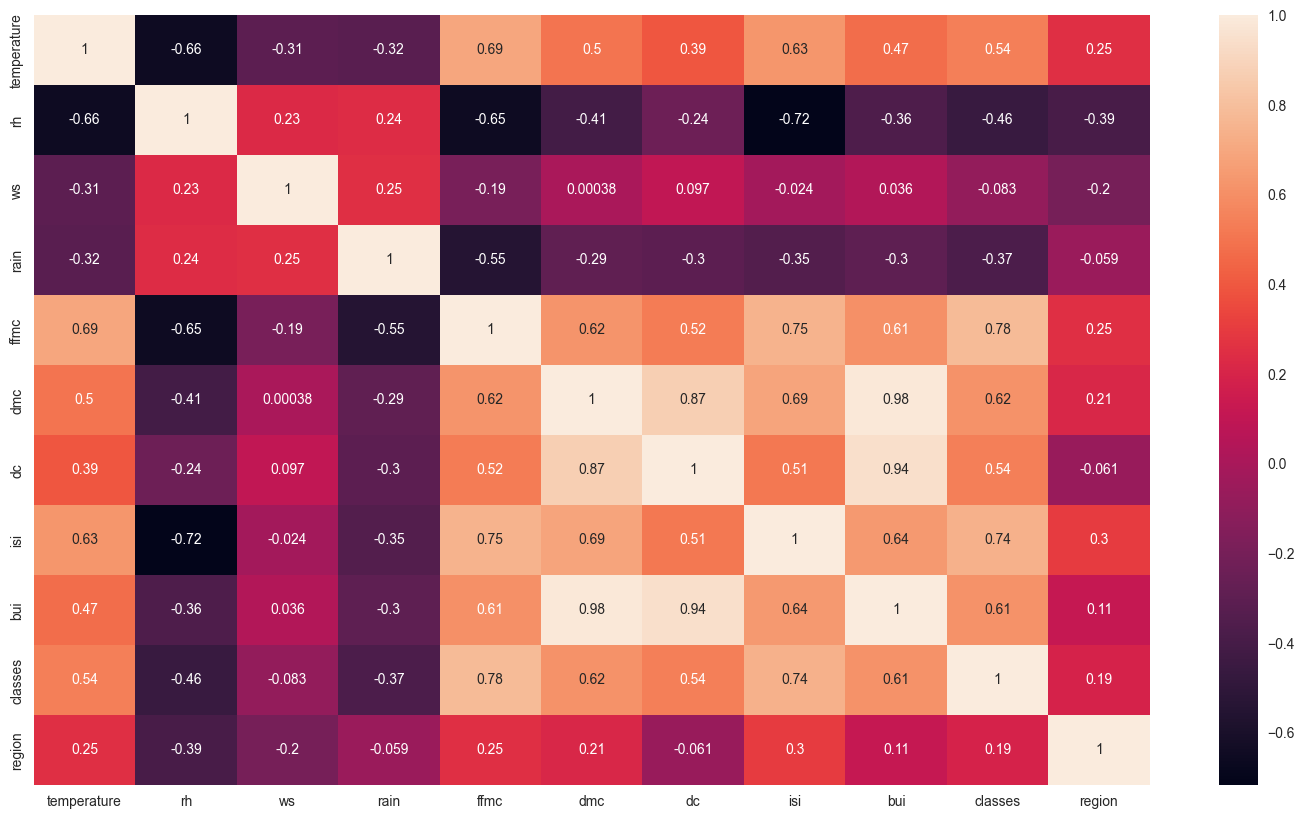

In [26]:
plt.figure(figsize=(18,10))
sns.heatmap(X_train_corr, annot=True)

plt.show();

In [27]:
def correlation_detector(dataset,threshold):

    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:

                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)

    return col_corr

In [28]:
corr_ftrs = correlation_detector(X_train, 0.85) 

In [29]:
# Detect correlated features
corr_ftrs

{'bui', 'dc'}

In [30]:
# From X_train & X_test: Remove extremely well correlated features to avoid multicollinearity
X_train.drop(corr_ftrs, axis=1, inplace=True)
X_test.drop(corr_ftrs, axis=1, inplace=True)

In [31]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

## Feature Scaling

### Standardisation

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [37]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

## Boxplots: Effect of StandardScaler

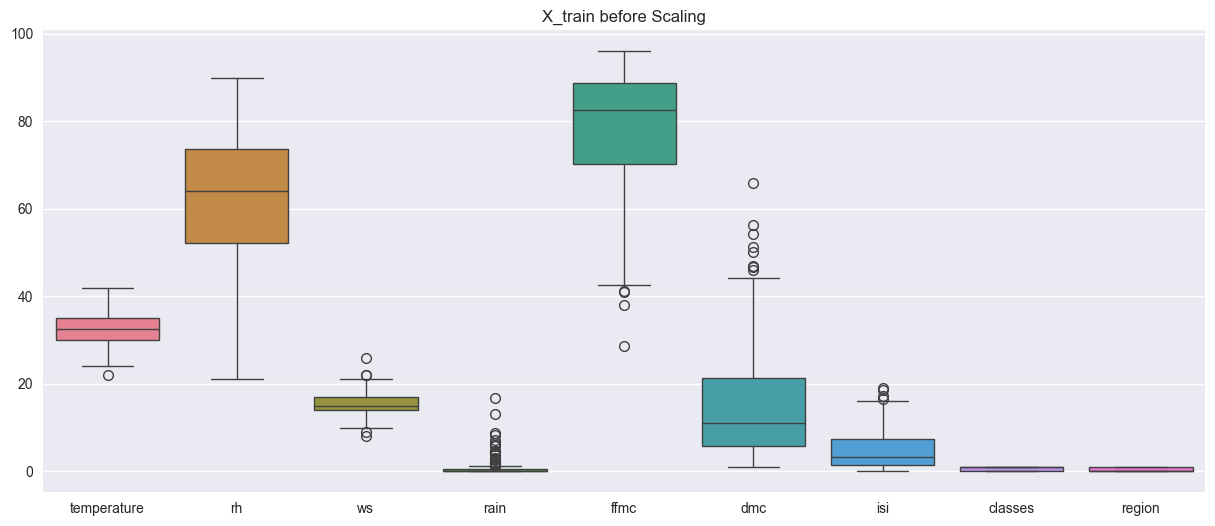

In [38]:
plt.figure(figsize=(15,6))

sns.boxplot(data=X_train)
plt.title('X_train before Scaling');

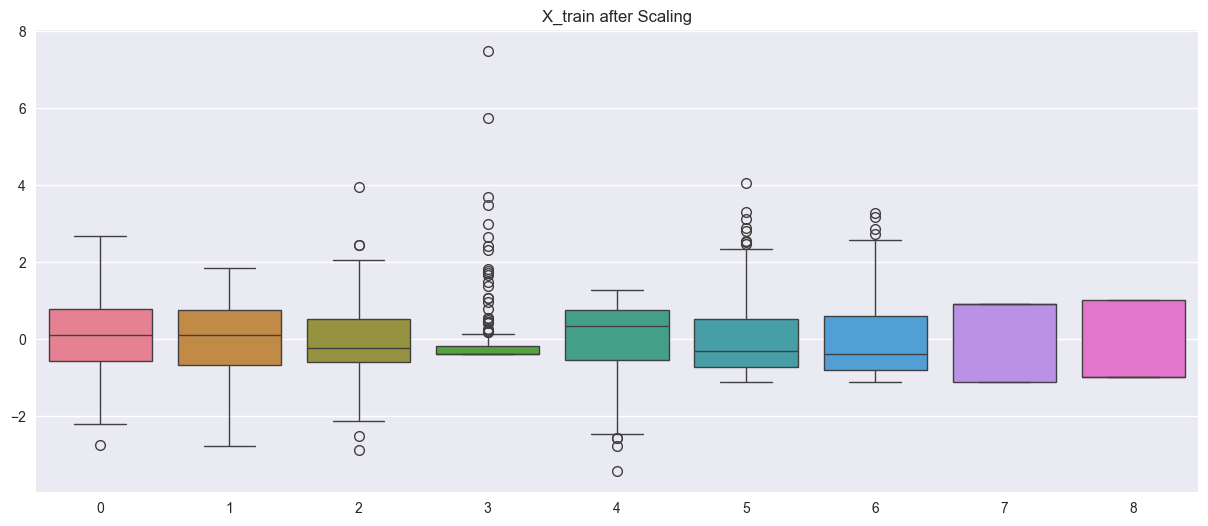

In [39]:
plt.figure(figsize=(15,6))

sns.boxplot(data=X_train_scaled)
plt.title('X_train after Scaling');

---

## Model Training

### Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linreg = LinearRegression()

In [42]:
linreg.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# Prediction: Linear Regression
y_pred_linreg = linreg.predict(X_test_scaled)

In [44]:
y_pred_linreg

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [45]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
mae = mean_absolute_error(y_test,y_pred_linreg)
mse = mean_squared_error(y_test,y_pred_linreg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_linreg)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [47]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  0.5468236465249987
mse:  0.67427668737916
rmse:  0.8211435242265265
r2:  0.9847657384266951
adj_r2:  0.9820773393255237


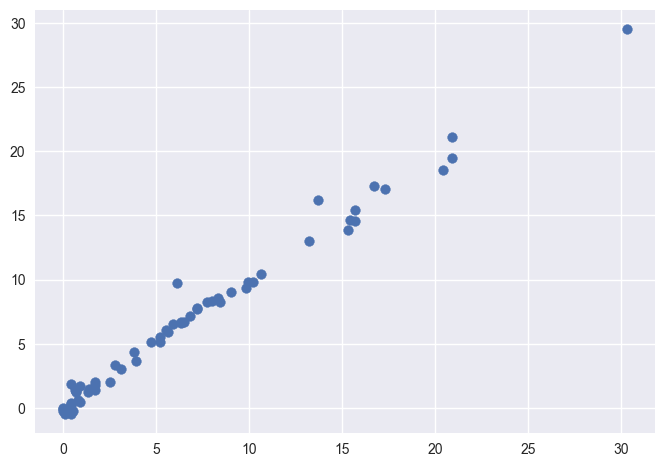

In [48]:
plt.scatter(y_test,y_pred_linreg)

---

### Lasso Regression

- L1 Regularisation: helps reduce overfitting
- Feature Selection: 
- Handles Multicollinearity

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso()

In [51]:
lasso.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [52]:
# y_pred: Lasso
y_pred_lasso = lasso.predict(X_test_scaled)

In [53]:
y_pred_lasso

array([ 7.84570511,  7.4760351 ,  1.06280248,  5.57182566,  7.15885302,
        2.98472993,  3.29585571,  7.88757659,  2.64885633,  3.93029159,
        1.49954269,  9.90939713,  9.38584995, 15.7567602 , 16.31754696,
        2.94285845,  2.56817739, -0.40623463,  7.0973165 ,  4.05837568,
        2.78651163,  0.83183302,  6.46086185,  0.80409291, 19.21068568,
        5.76645732,  5.86530516,  9.16901185, -0.64326039,  9.83769504,
        6.56628861,  1.06684001,  9.62691324, 13.06176805,  2.57722597,
        2.28322385,  2.59487225,  6.44426082,  0.37191286,  0.3915779 ,
        6.32171041,  2.93276462,  8.11248975, -0.54845009, 14.49798226,
        7.96825553,  8.55326749,  2.03662688, 12.4409409 ,  1.88633635,
       25.87619242,  6.07660958, 15.93875663, 17.14160346, 12.52311598,
       14.3603987 ,  2.35836911,  9.12915914,  4.68421388, 13.65732474,
        5.85117379])

In [54]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
mae = mean_absolute_error(y_test,y_pred_lasso)
mse = mean_squared_error(y_test,y_pred_lasso)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lasso)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [56]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  1.133175994914409
mse:  2.2483458918974764
rmse:  1.4994485292591662
r2:  0.9492020263112388
adj_r2:  0.9402376780132222


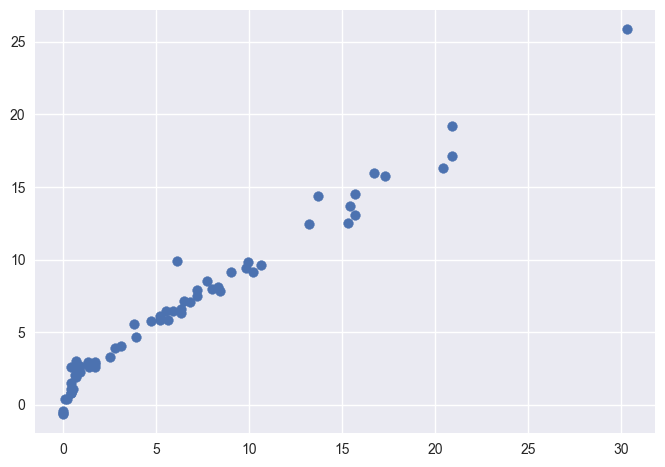

In [57]:
plt.scatter(y_test,y_pred_lasso)

## LassoCV

In [58]:
from sklearn.linear_model import LassoCV

In [59]:
lassoCV = LassoCV(cv=5)

In [60]:
lassoCV.fit(X_train_scaled, y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [106]:
lassoCV.alpha_

np.float64(0.05725391318234408)

In [107]:
lassoCV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [108]:
lassoCV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [61]:
y_pred_lassocv = lassoCV.predict(X_test_scaled)

In [62]:
y_pred_lassocv

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [63]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
mae = mean_absolute_error(y_test,y_pred_lassocv)
mse = mean_squared_error(y_test,y_pred_lassocv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lassocv)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [65]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  0.6199701158263436
mse:  0.7924995554743638
rmse:  0.8902244410677365
r2:  0.9820946715928274
adj_r2:  0.9789349077562675


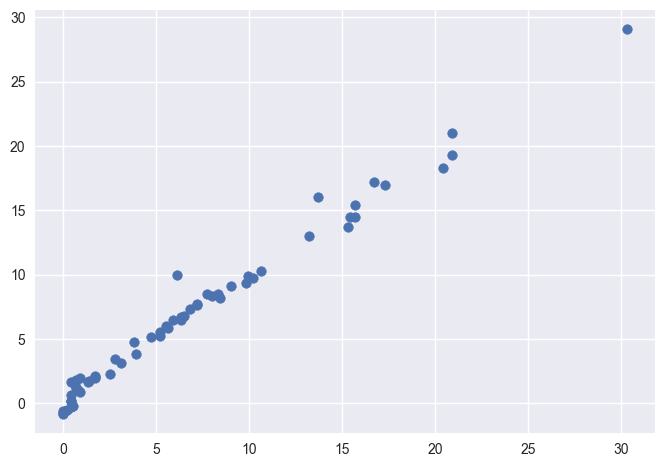

In [66]:
plt.scatter(y_test,y_pred_lassocv)

## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

In [68]:
ridge = Ridge()

In [69]:
ridge.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [70]:
y_pred_ridge = ridge.predict(X_test_scaled)

In [71]:
y_pred_ridge

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

In [72]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
mae = mean_absolute_error(y_test,y_pred_ridge)
mse = mean_squared_error(y_test,y_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridge)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [74]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  0.5642305340105704
mse:  0.6949198918152095
rmse:  0.833618552945656
r2:  0.9842993364555512
adj_r2:  0.9815286311241779


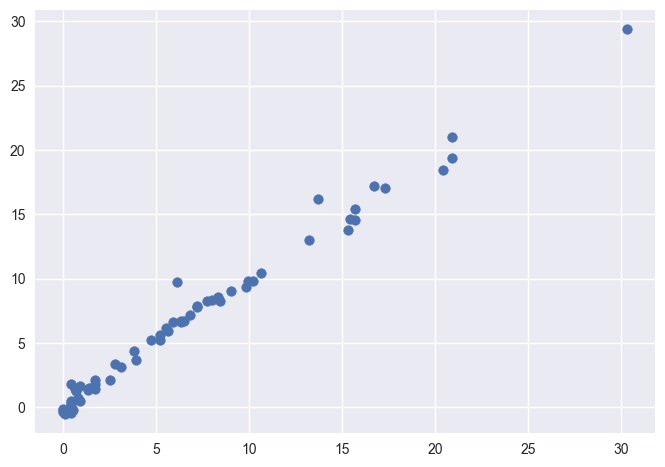

In [75]:
plt.scatter(y_test,y_pred_ridge)

## RidgeCV

In [76]:
from sklearn.linear_model import RidgeCV

In [77]:
ridgecv = RidgeCV(cv=5)

In [78]:
ridgecv.fit(X_train_scaled, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [79]:
y_pred_ridgecv = ridgecv.predict(X_test_scaled)

In [80]:
y_pred_ridgecv

array([ 8.23695957,  7.77133489, -0.20576373,  4.38641746,  6.73014882,
        1.38083778,  2.09821574,  7.89573609,  1.68710448,  3.39608166,
        0.45955107,  9.77115691,  9.35289622, 17.03184252, 18.46891974,
        1.31920963,  1.83197436, -0.12967473,  7.18616187,  3.15029834,
        1.4415705 ,  0.20532056,  6.60901914,  0.34619299, 20.97777968,
        5.22692975,  5.97066219,  9.82599838, -0.18171193,  9.83698303,
        6.65050786, -0.43256887, 10.40995342, 14.57517502,  1.52182034,
        0.47799404,  2.09598786,  6.18530003, -0.51720703, -0.27108924,
        6.74656177,  1.8115675 ,  8.60302337, -0.34697492, 15.41467762,
        8.34164636,  8.27783782,  1.41852757, 12.97837116,  1.24905696,
       29.40913561,  5.66093325, 17.23898525, 19.38721803, 13.82278407,
       16.19164908,  0.70419803,  9.05107798,  3.6760472 , 14.63186999,
        5.27050843])

In [81]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [82]:
mae = mean_absolute_error(y_test,y_pred_ridgecv)
mse = mean_squared_error(y_test,y_pred_ridgecv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ridgecv)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [83]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  0.5642305340105704
mse:  0.6949198918152095
rmse:  0.833618552945656
r2:  0.9842993364555512
adj_r2:  0.9815286311241779


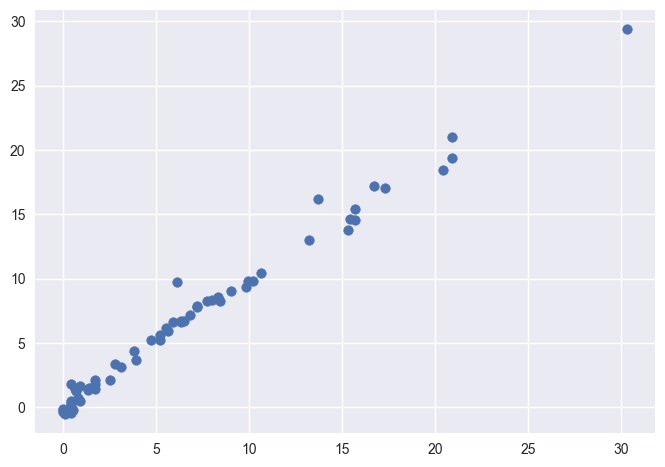

In [84]:
plt.scatter(y_test,y_pred_ridgecv)

In [85]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': False}

---

## ElasticNet Regression

In [86]:
from sklearn.linear_model import ElasticNet

In [87]:
elasticnet = ElasticNet()

In [88]:
elasticnet.fit(X_train_scaled,y_train)

,alpha,1.0
,l1_ratio,0.5
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [89]:
y_pred_elasticnet = elasticnet.predict(X_test_scaled)

In [90]:
y_pred_elasticnet

array([ 8.440192  ,  8.48416748,  1.58398174,  5.74704744,  7.99925012,
        3.84543773,  4.65423145,  9.85746701,  2.41164568,  4.42033198,
        1.69311557,  9.29479476,  9.94989153, 14.80040551, 14.99184886,
        3.85114187,  2.99061658, -0.97985369,  7.64927581,  6.40186267,
        2.76037744,  0.786395  ,  7.65023687,  1.04550366, 17.05166573,
        8.10156058,  7.10480686,  9.72405017, -1.63030854,  9.98040215,
        6.77739365,  1.80475174,  9.66423333, 12.61018368,  3.22848878,
        2.95760651,  4.2159643 ,  8.47055095, -0.0452998 , -0.22390909,
        8.07425176,  3.59582409,  9.01788865, -1.00255442, 13.98138726,
        8.47227471,  8.66221408,  2.37166362, 12.20709739,  2.13892487,
       22.42259827,  8.36459938, 14.18257366, 15.41045041, 12.03375106,
       13.32632753,  3.23749418,  9.62446446,  5.98090909, 13.781952  ,
        7.4239577 ])

In [91]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
mae = mean_absolute_error(y_test,y_pred_elasticnet)
mse = mean_squared_error(y_test,y_pred_elasticnet)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elasticnet)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [93]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  1.8822353634896
mse:  5.517251101025224
rmse:  2.3488829474933874
r2:  0.8753460589519703
adj_r2:  0.8533483046493768


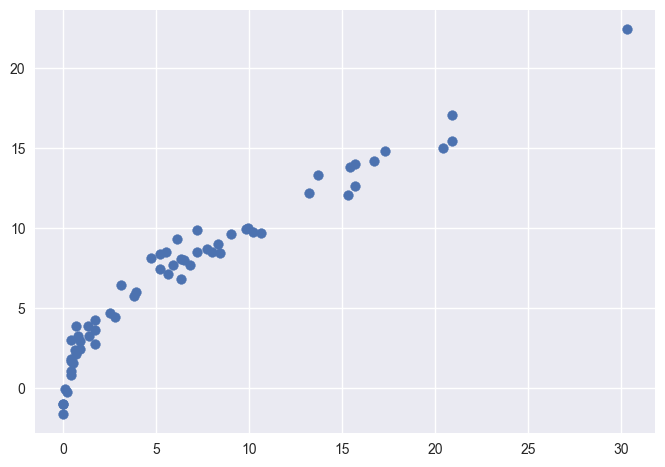

In [94]:
plt.scatter(y_test,y_pred_elasticnet)

---

## ElasticNetCV

In [95]:
from sklearn.linear_model import ElasticNetCV

In [96]:
elasticnetcv = ElasticNetCV(cv=5)

In [97]:
elasticnetcv.fit(X_train_scaled,y_train)

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [98]:
y_pred_elasticnetcv = elasticnetcv.predict(X_test_scaled)

In [99]:
y_pred_elasticnetcv

array([ 8.26896303,  7.80499035, -0.10373519,  4.5910001 ,  6.88725274,
        1.59410811,  2.35512483,  8.0623476 ,  1.72415002,  3.53713054,
        0.6324586 ,  9.86752845,  9.43037004, 16.93741658, 18.24537235,
        1.65750426,  1.70187606, -0.64660717,  7.25494999,  3.39769372,
        1.6585457 ,  0.11316128,  6.66222016,  0.2768868 , 20.66780763,
        5.47501303,  6.05587139,  9.84868106, -0.65326652,  9.93266416,
        6.72851251, -0.29425171, 10.39747097, 14.48835483,  1.70083377,
        0.73634118,  2.25453683,  6.37570352, -0.71507088, -0.36129277,
        6.8083341 ,  1.96274355,  8.60448104, -0.79781122, 15.32067065,
        8.39541208,  8.43742252,  1.41818555, 13.00237268,  1.28988758,
       28.93275959,  5.88819725, 17.04972357, 19.1125176 , 13.71477759,
       16.09820311,  0.99493652,  9.16486312,  3.91448039, 14.57731138,
        5.50092909])

In [100]:
# Performance Metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [101]:
mae = mean_absolute_error(y_test,y_pred_elasticnetcv)
mse = mean_squared_error(y_test,y_pred_elasticnetcv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elasticnetcv)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] -1)

In [102]:
print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2)
print('adj_r2: ', adj_r2)

mae:  0.65759467314309
mse:  0.8222830416276261
rmse:  0.9067982364493361
r2:  0.9814217587854941
adj_r2:  0.978143245629993


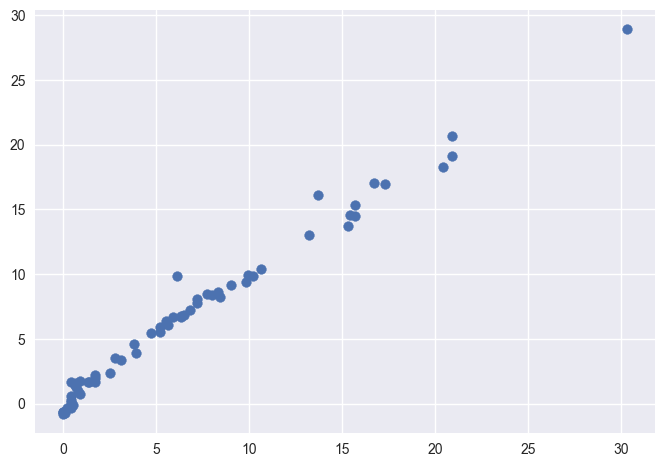

In [103]:
plt.scatter(y_test,y_pred_elasticnetcv)

In [105]:
elasticnetcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

---

## Pickle Model

In [109]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [110]:
linreg

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [111]:
import pickle

In [112]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [113]:
pickle.dump(linreg, open('linreg.pkl', 'wb'))

---